<h3>Zipf's Law</h3>

Zipf's law (/ˈzɪf/) is an empirical law formulated using mathematical statistics that refers to the fact that many types of data studied in the physical and social sciences can be approximated with a Zipfian distribution, one of a family of related discrete power law probability distributions. Zipf distribution is related to the zeta distribution, but is not identical.

For example, Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation. For example, in the Brown Corpus of American English text, the word the is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word of accounts for slightly over 3.5% of words (36,411 occurrences), followed by and (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.

Reference: https://en.wikipedia.org/wiki/Zipf%27s_law


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns



In [8]:
df = pd.read_csv('data/train.csv', sep='|')
df = df[['Phrase']]
df['clean_text'] = df['Phrase'].apply(lambda x: re.sub('[^A-Za-z\']', ' ', x.lower()))
df.head()

,Phrase,clean_text
0,A series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
1,A series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
2,A series,a series
3,A,a
4,series,series


In [9]:
word_list = ' '.join(df.clean_text.values).split(' ')
words = pd.DataFrame(word_list, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'n']
word_counts['word_rank'] = word_counts.n.rank(ascending=False)


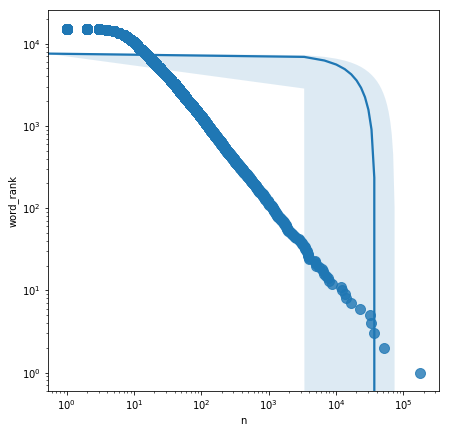

In [10]:
%matplotlib inline

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("n", "word_rank", word_counts, ax=ax, scatter_kws={"s": 100})

<h4>Summary</h4>
The frequency chart shows that spaces, the, a, of, and etc., 
(i.e., stopwords make up the highest percentage of words)
How low to set the weed out point?
                                                             

In [11]:
print(word_counts)

                  word       n  word_rank
0                       175845        1.0
1                  the   51633        2.0
2                    a   36415        3.0
3                   of   32702        4.0
4                  and   32177        5.0
5                   to   22761        6.0
6                   's   16971        7.0
7                   in   13997        8.0
8                   is   13476        9.0
9                 that   12338       10.0
10                  it   11734       11.0
11                  as    8651       12.0
12                with    7750       13.0
13                 for    7553       14.0
14                 its    7051       15.0
15                film    6733       16.0
16                  an    6502       17.0
17               movie    6241       18.0
18                this    5677       19.0
19                 but    5126       20.0
20                  be    5053       21.0
21                  on    4893       22.0
22                 you    4855    